<a href="https://colab.research.google.com/github/CaioSepulveda/analise-academica/blob/main/Python_An%C3%A1lise_Acad%C3%AAmica_dos_Estudantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
dados = pd.read_csv('/content/drive/MyDrive/Analise de Dados/Datasets/student_habits_performance.csv')
dados.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


Agora que carregamos o arquivo, vamos conferir se há dados faltando.

In [10]:
dados.isna().any()

,0
student_id,False
age,False
gender,False
study_hours_per_day,False
social_media_hours,False
netflix_hours,False
part_time_job,False
attendance_percentage,False
sleep_hours,False
diet_quality,False


Confirmada a integridade de nosso dataset, vamos à vizualização das estatísticas descritivas dos dados.

In [14]:
dados.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


Vamos produzir alguns gráficos para entender melhor o perfil dos alunos, antes de produzir nossos insights

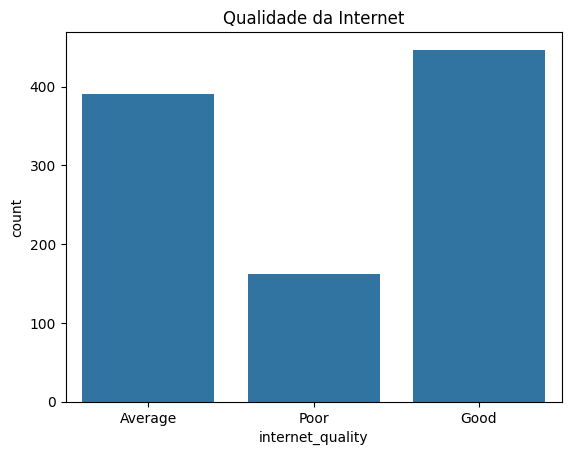

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='internet_quality', data=dados)
plt.title('Qualidade da Internet')
plt.show()

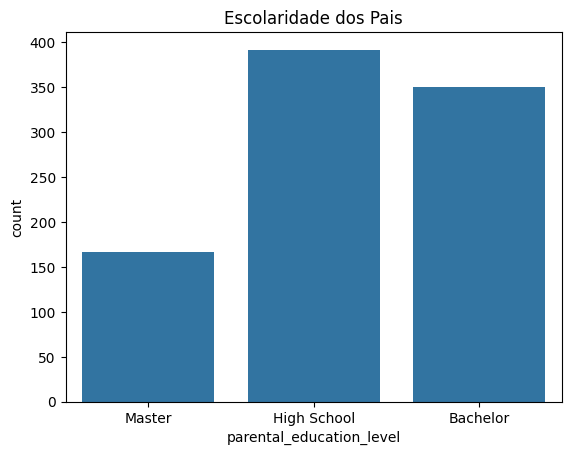

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='parental_education_level', data=dados)
plt.title('Escolaridade dos Pais')
plt.show()

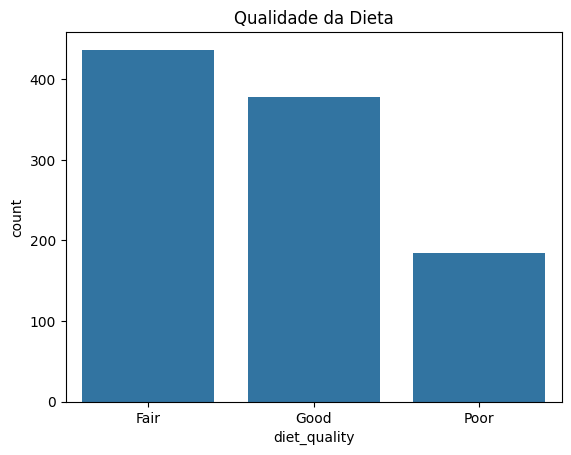

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='diet_quality', data=dados)
plt.title('Qualidade da Dieta')
plt.show()

Dentre os dados disponíveis, temos informações referentes a fatores socioeconômicos (Qualidade da internet, da dieta e nível educacional dos país) e fatores mais associados a questões acadêmicos, como presença nas aulas e horas de estudo por dia. Combinaremos os dados com  os resultados dos estudantes para produzir insights.

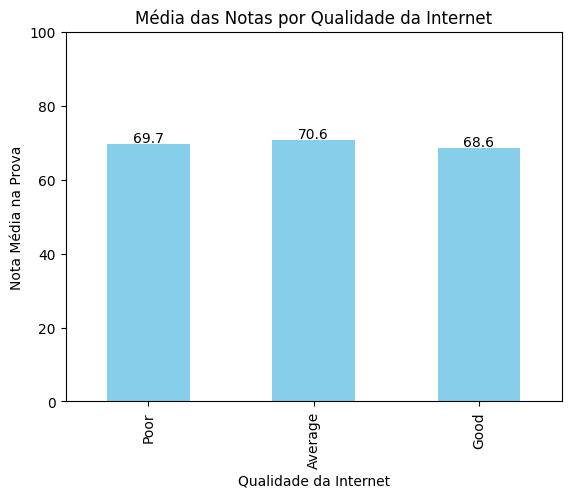

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a média das notas por grupo de qualidade da internet
media_por_grupo = dados.groupby('internet_quality')['exam_score'].mean().reindex(['Poor', 'Average', 'Good'])

# Plotar o gráfico de barras
media_por_grupo.plot(kind='bar', color='skyblue')

plt.title('Média das Notas por Qualidade da Internet')
plt.ylabel('Nota Média na Prova')
plt.xlabel('Qualidade da Internet')

# Adicionar os valores em cima das barras
for i, val in enumerate(media_por_grupo):
    plt.text(i, val + 0.5, f'{val:.1f}', ha='center')

plt.ylim(0, 100)  # Garante que o eixo vá até 100
plt.show()


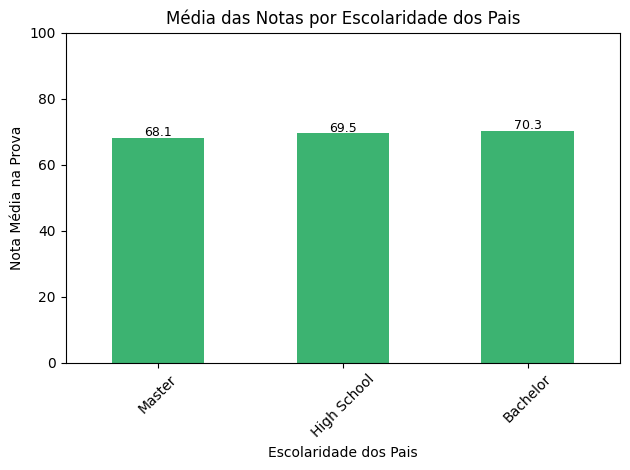

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a média das notas por nível de escolaridade dos pais
media_escolaridade = dados.groupby('parental_education_level')['exam_score'].mean().sort_values()

# Criar o gráfico
media_escolaridade.plot(kind='bar', color='mediumseagreen')

plt.title('Média das Notas por Escolaridade dos Pais')
plt.ylabel('Nota Média na Prova')
plt.xlabel('Escolaridade dos Pais')

# Adicionar os valores em cima das barras
for i, val in enumerate(media_escolaridade):
    plt.text(i, val + 0.5, f'{val:.1f}', ha='center', fontsize=9)

plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


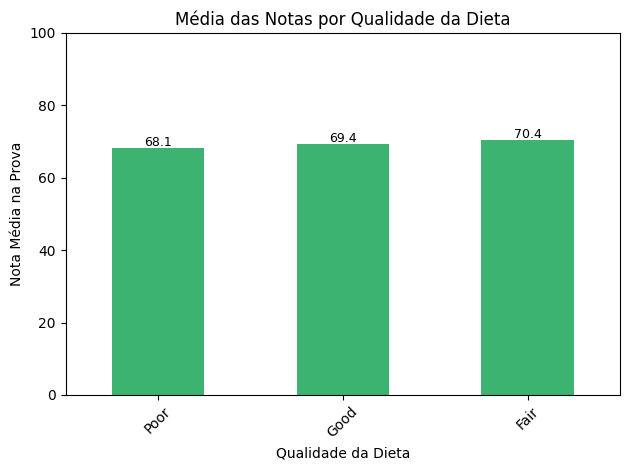

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a média das notas por Qualidade da Dieta
media_dieta = dados.groupby('diet_quality')['exam_score'].mean().sort_values()

# Criar o gráfico
media_dieta.plot(kind='bar', color='mediumseagreen')

plt.title('Média das Notas por Qualidade da Dieta')
plt.ylabel('Nota Média na Prova')
plt.xlabel('Qualidade da Dieta')

# Adicionar os valores em cima das barras
for i, val in enumerate(media_dieta):
    plt.text(i, val + 0.5, f'{val:.1f}', ha='center', fontsize=9)

plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




Os fatores qualidade da dieta, educação dos país e qualidade da internet, todos considerados socioeconômicos não foram relevantes no resultado dos estudantes, uma vez que todos os grupos atingiram médias similares.

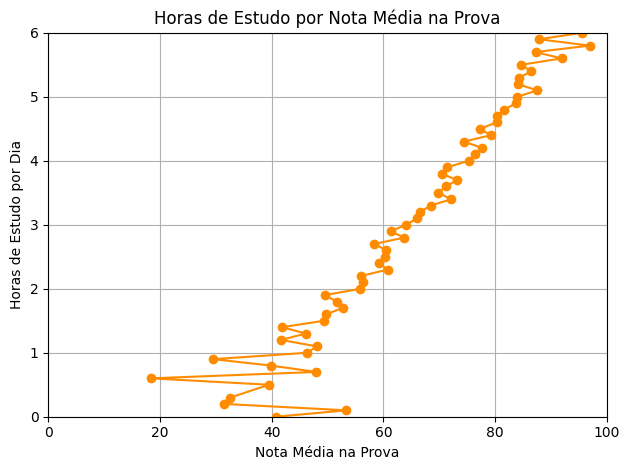

In [54]:
import matplotlib.pyplot as plt

# Calcular a média das notas para cada nível de horas estudadas por dia
media_estudo = dados.groupby('study_hours_per_day')['exam_score'].mean().sort_index()

# Nota no eixo X, horas no Y
plt.plot(media_estudo.values, media_estudo.index, marker='o', linestyle='-', color='darkorange')

plt.title('Horas de Estudo por Nota Média na Prova')
plt.xlabel('Nota Média na Prova')
plt.ylabel('Horas de Estudo por Dia')

# Adicionar grid e limites
plt.grid(True)
plt.xlim(0, 100)
plt.ylim(0, 6)
plt.tight_layout()
plt.show()


O fator horas estudadas por dia foi extremamente relevante para o resultado, uma vez que as maiores notas, em média, se concentram entre os grupos os quais estudaram por mais horas/dia.

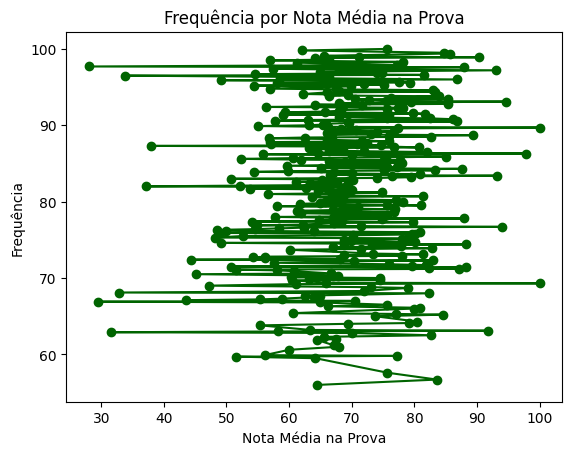

In [56]:
import matplotlib.pyplot as plt

# Calcular a média das notas para cada nível de frequência
media_freq = dados.groupby('attendance_percentage')['exam_score'].mean().sort_index()

# Nota no eixo X, frequência no Y
plt.plot(media_freq.values, media_freq.index, marker='o', linestyle='-', color='darkgreen')

plt.title('Frequência por Nota Média na Prova')
plt.xlabel ('Nota Média na Prova')
plt.ylabel ('Frequência')







plt.show()





O fator frequência à aula não demonstra grande impacto no resultado da prova, visto sua amplitude. Há alunos muito faltosos com bons resultados e vice versa.